# Loan Application Status Prediction

#Problem Statement:

    This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 






# Importing all the necessary libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")



In [5]:
loan=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [6]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
loan.shape   ###no.of rows and coloumn in dataset

(614, 13)

In [8]:
loan.dtypes  ###helps to find datatype  of our coloumn


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
loan.drop("Loan_ID", axis=1, inplace=True)  ###As it is not important in our dataset we remove Loan_ID coloumn


In [12]:
loan.isnull().sum()  ###checking the null values in our dataset

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
loan.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# Statistical Analysis

In [14]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


From this,We come to know we have some null values present in our dataset,numerical data shows there is apresence of outliers

# EDA

# Univariate analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

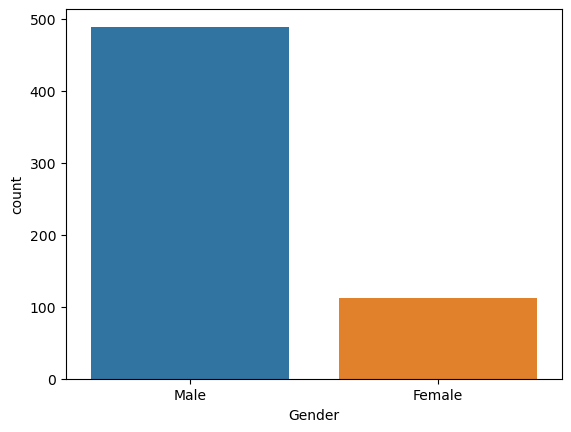

In [15]:
sns.countplot(loan["Gender"])


<AxesSubplot:xlabel='Married', ylabel='count'>

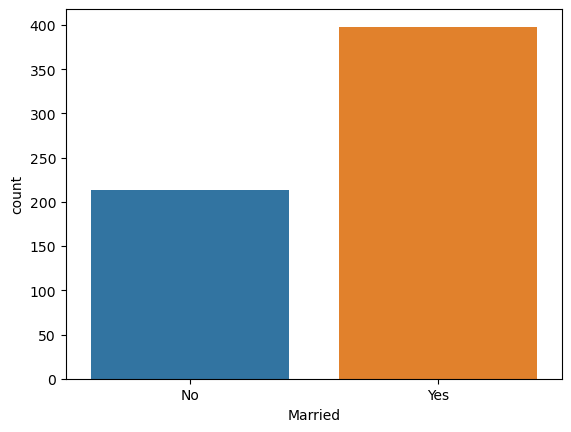

In [16]:
sns.countplot(loan["Married"])

<AxesSubplot:xlabel='Education', ylabel='count'>

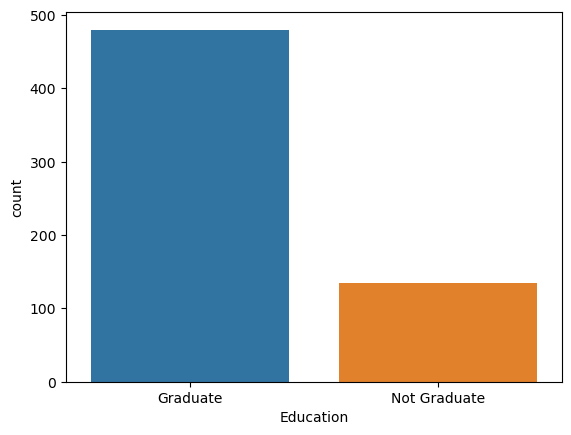

In [17]:
sns.countplot(loan["Education"])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

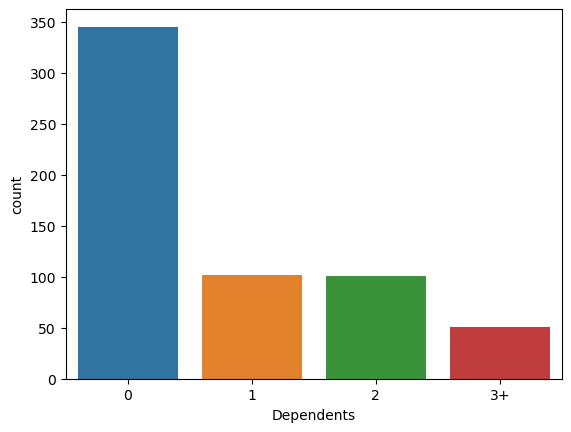

In [18]:
sns.countplot(loan["Dependents"])


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

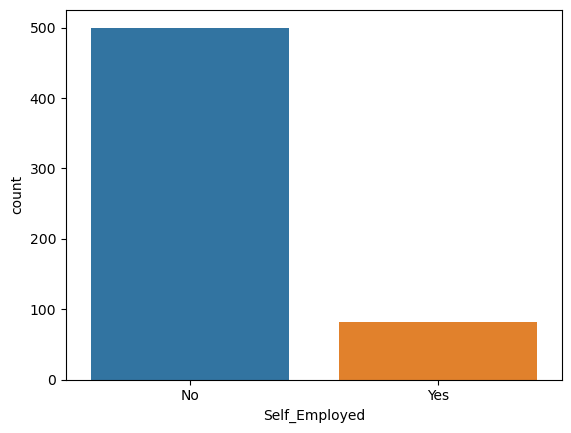

In [19]:
sns.countplot(loan["Self_Employed"])


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

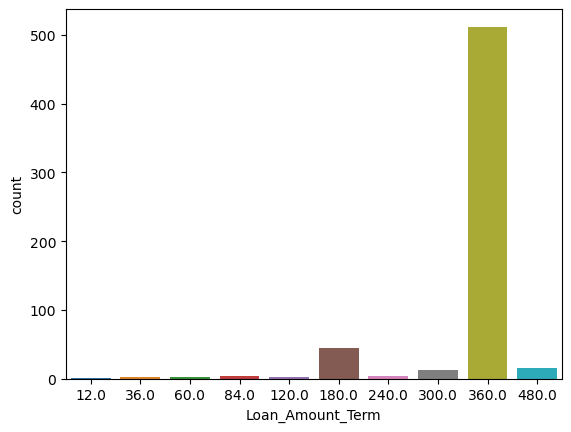

In [20]:

sns.countplot(loan["Loan_Amount_Term"])

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

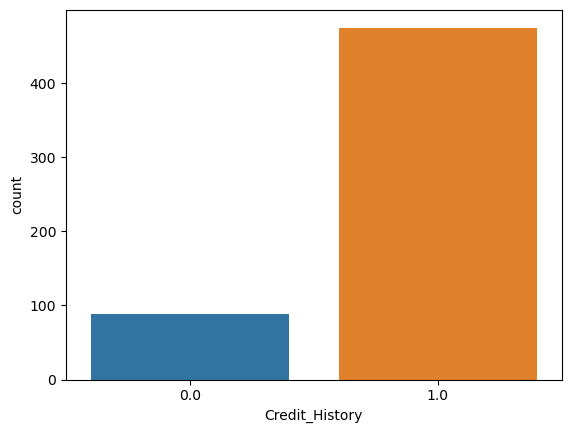

In [21]:
sns.countplot(loan["Credit_History"])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

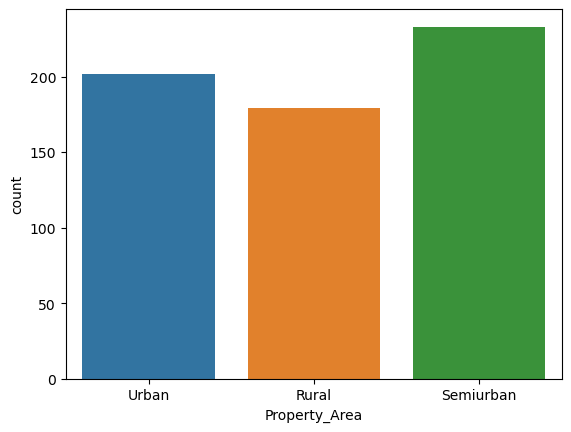

In [22]:
sns.countplot(loan["Property_Area"])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

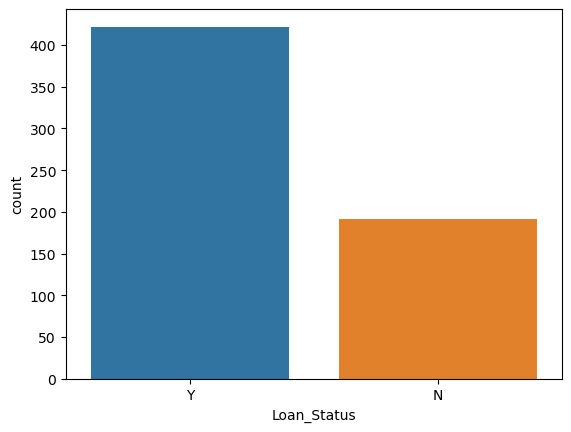

In [23]:
sns.countplot(loan["Loan_Status"])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

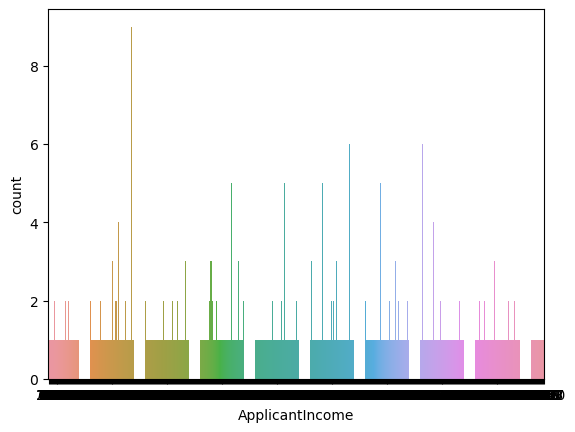

In [24]:
sns.countplot(loan["ApplicantIncome"])


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='count'>

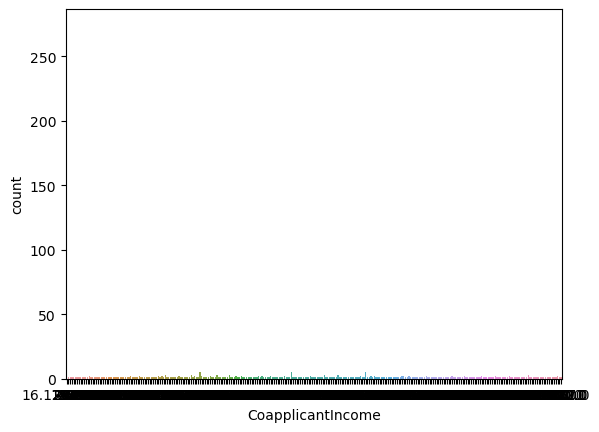

In [25]:
sns.countplot(loan["CoapplicantIncome"])

<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

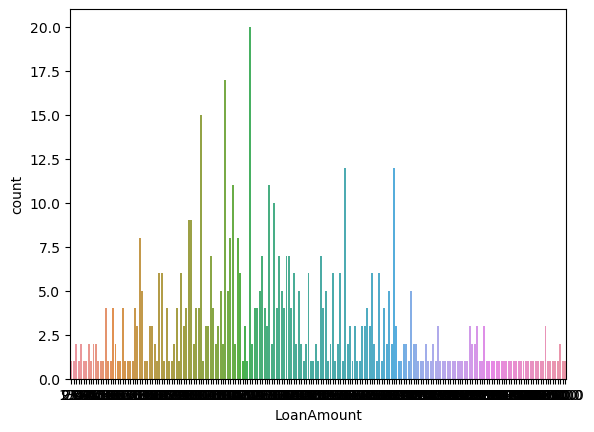

In [26]:
sns.countplot(loan["LoanAmount"])


     


From the above plot, we have seen each coloumn valuecount visualization and we can see LoanAmount,CoapplicantIncome and ApplicantIncome are continous variables and the remaining are categorical variables

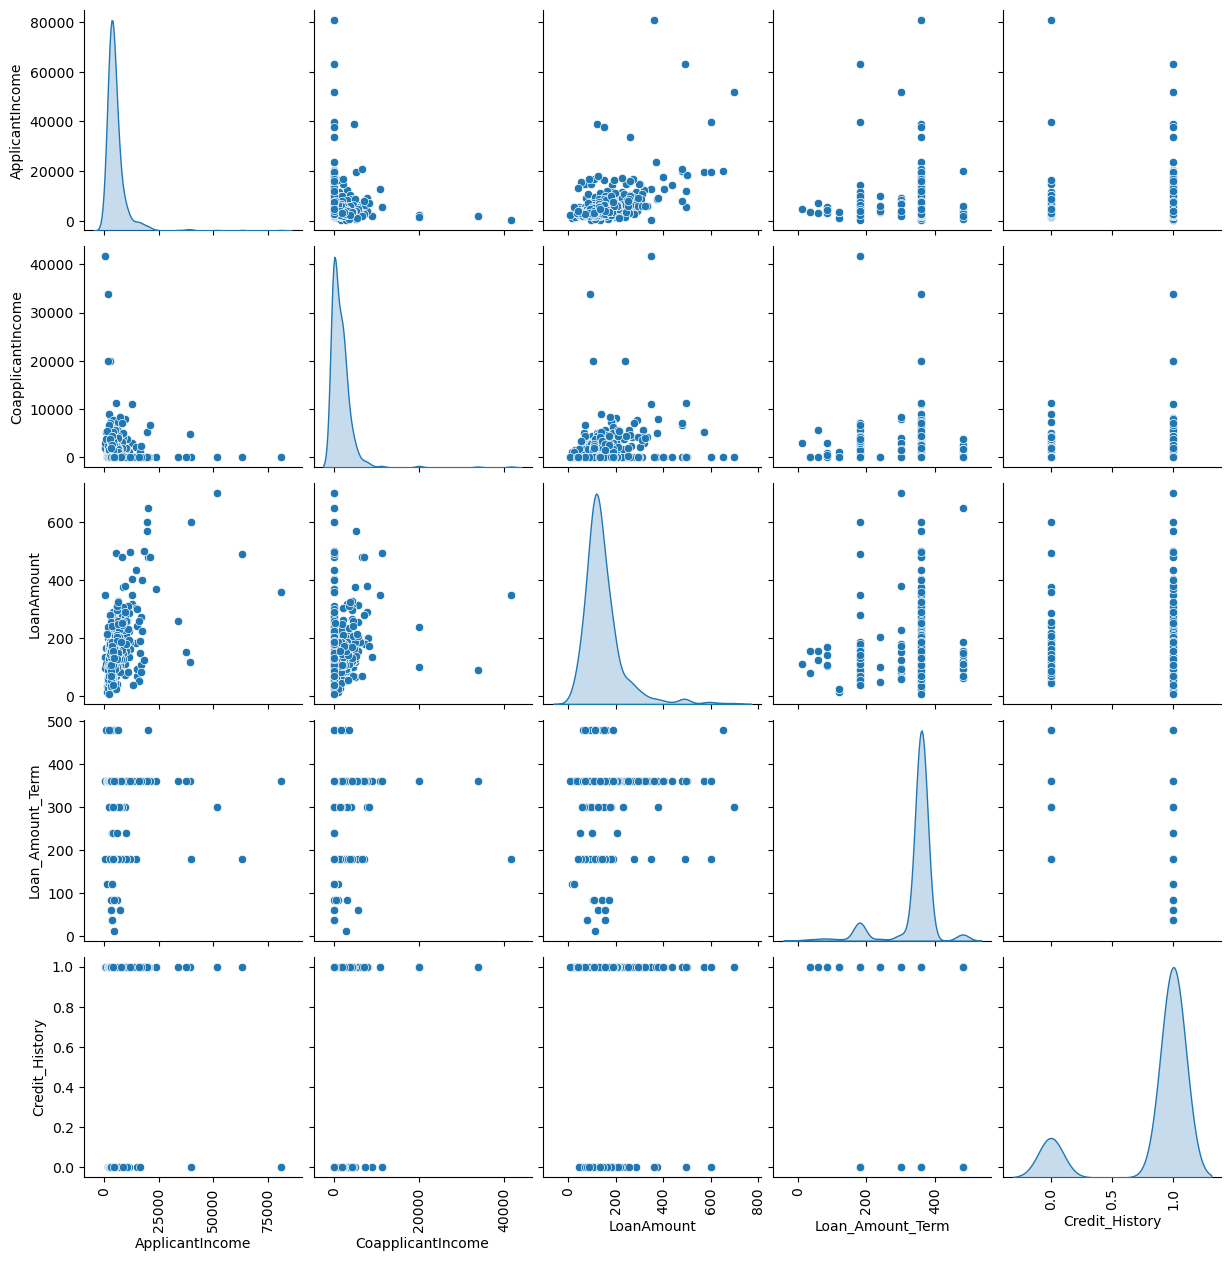

In [30]:
plt.style.use('default')
g = sns.pairplot(loan, diag_kind="kde")
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

From the above plot,we can see how each coloumn didtributed

# Filling the null values

In [ ]:
# filling continous data columns with the mean value of that column
loan['LoanAmount'] = loan['LoanAmount'].fillna(loan['LoanAmount'].mean())
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mean())

# filling categorical data columns with the mode value of that column
loan['Credit_History']=loan['Credit_History'].fillna(loan['Credit_History'].mode()[0])
loan['Gender'] = loan['Gender'].fillna(loan['Gender'].mode()[0])
loan['Married'] = loan['Married'].fillna(loan['Married'].mode()[0])
loan['Dependents'] = loan['Dependents'].fillna(loan['Dependents'].mode()[0])
loan['Self_Employed'] = loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0])



In [34]:
loan.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

we have filled the missing values in ourdataset using mean and mode

# Encoder

In [38]:


le = LabelEncoder()
loan["Loan_Status"] = le.fit_transform(loan["Loan_Status"])
loan.head()



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [42]:
# Ordinal Encoder

oe = OrdinalEncoder()
loan['Gender'] = oe.fit_transform(loan['Gender'].values.reshape(-1,1))
loan['Married'] = oe.fit_transform(loan['Married'].values.reshape(-1,1))
loan['Dependents'] = oe.fit_transform(loan['Dependents'].values.reshape(-1,1))
loan['Education'] = oe.fit_transform(loan['Education'].values.reshape(-1,1))
loan['Self_Employed'] = oe.fit_transform(loan['Self_Employed'].values.reshape(-1,1))
loan['Property_Area'] = oe.fit_transform(loan['Property_Area'].values.reshape(-1,1))
loan.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1


I have used LabelEncoder technique to convert the objectdatatype Loan_Status to a numerical format.And I have used OrdinalEncoder to ensure that the number of columns do not get increased unnecessarily.

In [121]:
loan.shape

(577, 12)

In [44]:
loan.isna().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now we can see there are null values in our dataset

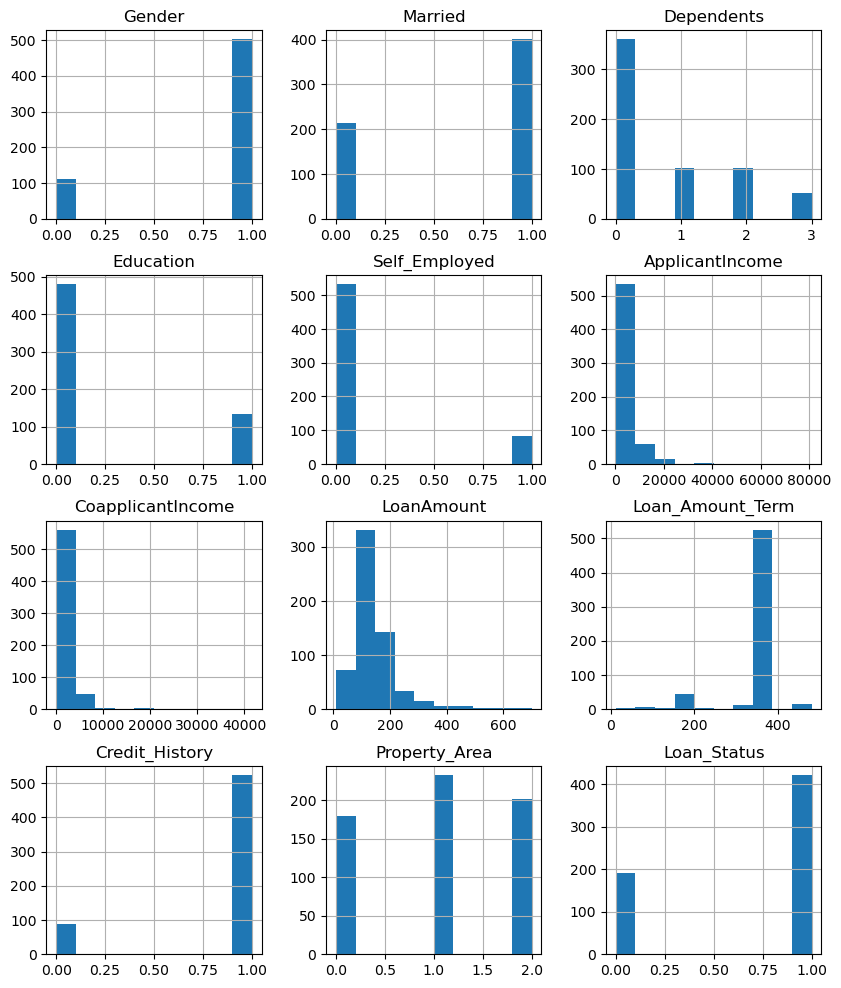

In [47]:
loan.hist(figsize=(10,12))
plt.show()


# Heatmap

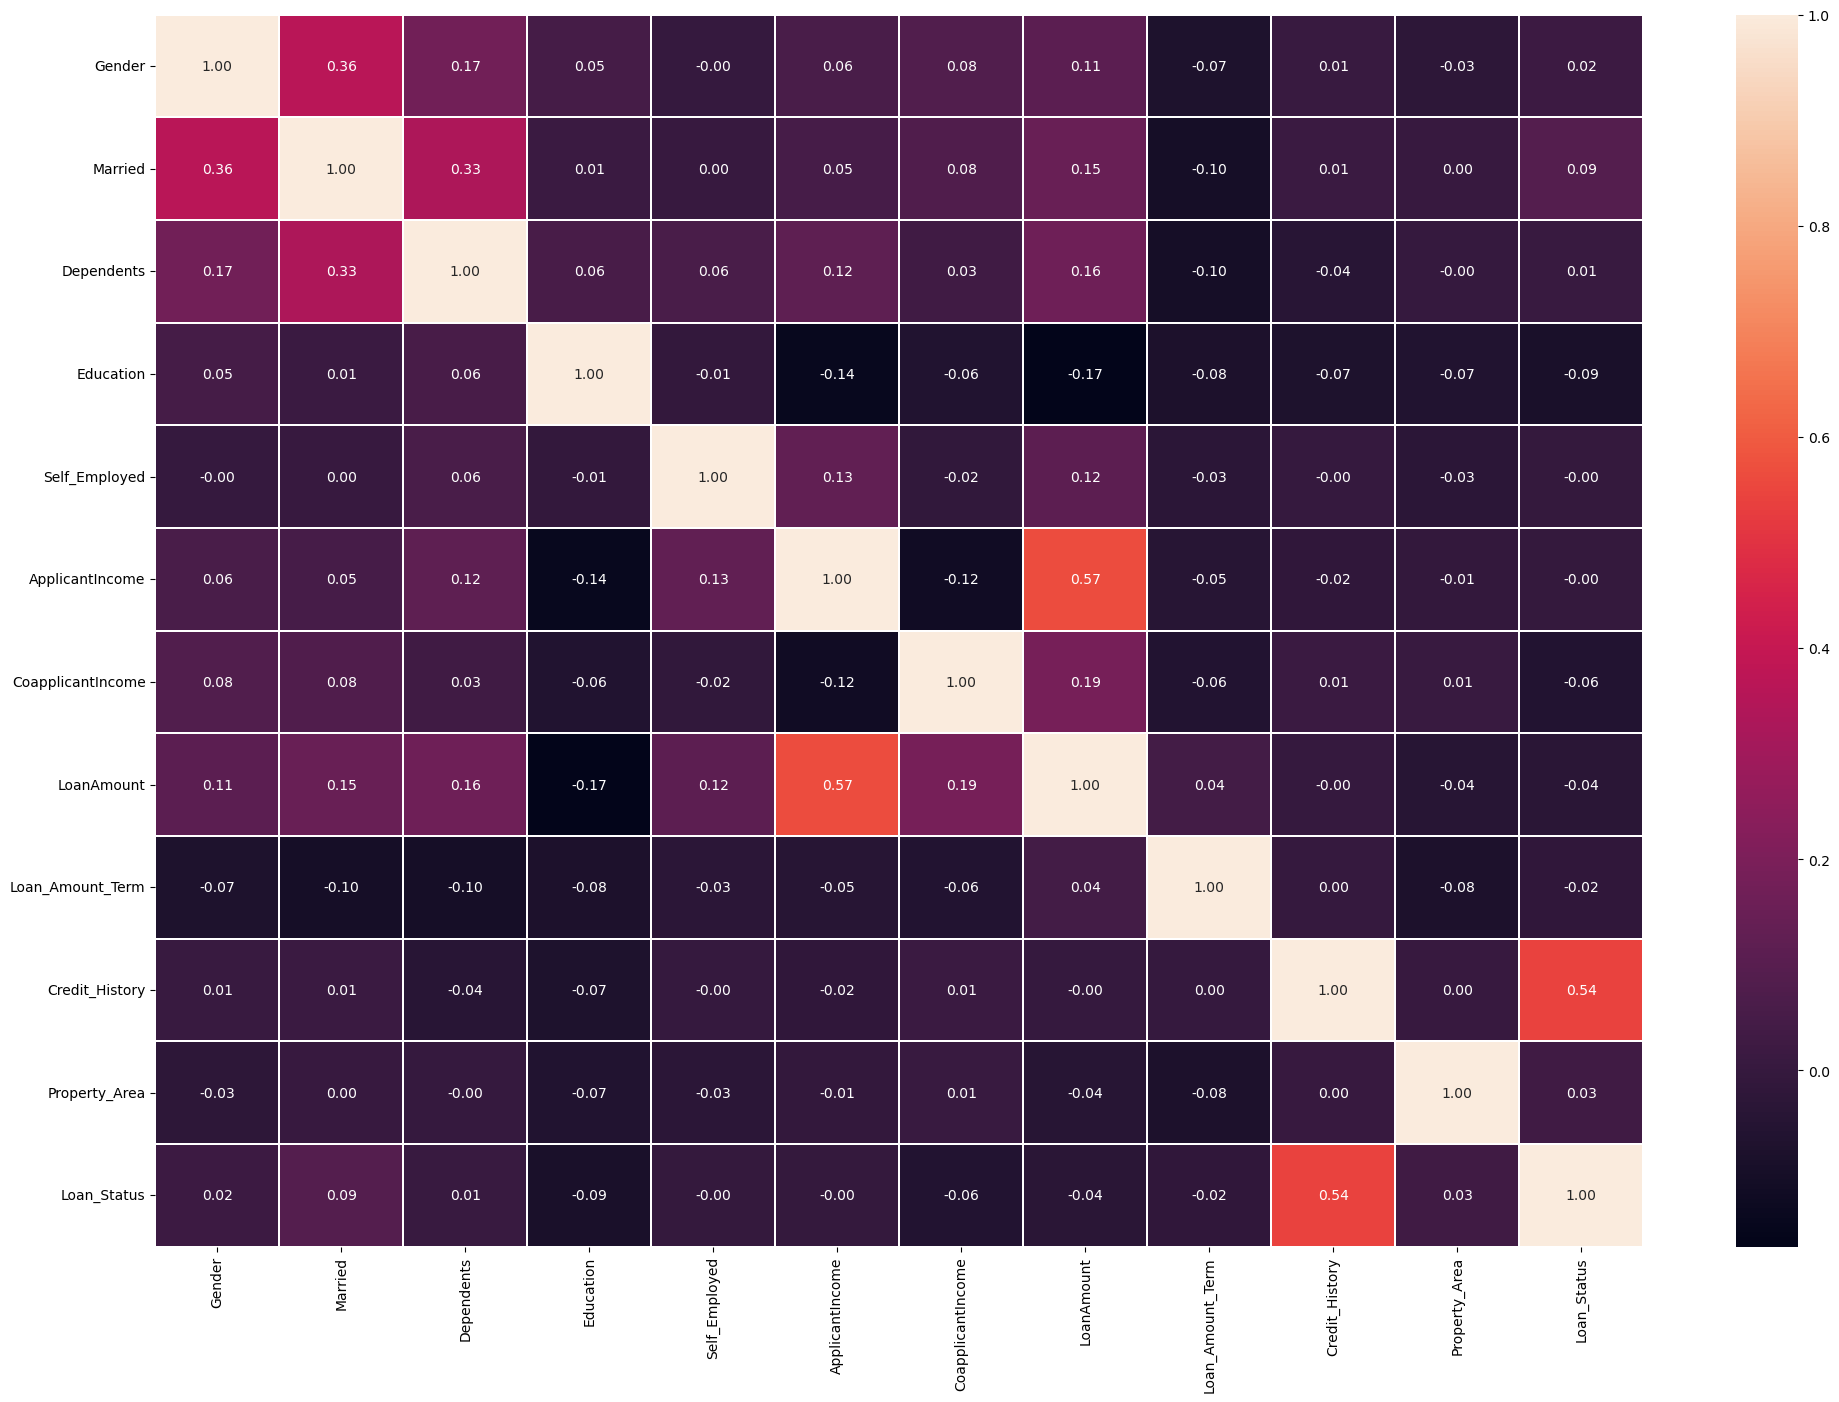

In [50]:
plt.figure(figsize=(24,16))
sns.heatmap(loan.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()


From the heatmap,I can see no multicollinearity present in our dataset

# Checking the outliers

Gender                  AxesSubplot(0.125,0.653529;0.168478x0.226471)
Married              AxesSubplot(0.327174,0.653529;0.168478x0.226471)
Dependents           AxesSubplot(0.529348,0.653529;0.168478x0.226471)
Education            AxesSubplot(0.731522,0.653529;0.168478x0.226471)
Self_Employed           AxesSubplot(0.125,0.381765;0.168478x0.226471)
ApplicantIncome      AxesSubplot(0.327174,0.381765;0.168478x0.226471)
CoapplicantIncome    AxesSubplot(0.529348,0.381765;0.168478x0.226471)
LoanAmount           AxesSubplot(0.731522,0.381765;0.168478x0.226471)
Loan_Amount_Term            AxesSubplot(0.125,0.11;0.168478x0.226471)
Credit_History           AxesSubplot(0.327174,0.11;0.168478x0.226471)
Property_Area            AxesSubplot(0.529348,0.11;0.168478x0.226471)
Loan_Status              AxesSubplot(0.731522,0.11;0.168478x0.226471)
dtype: object

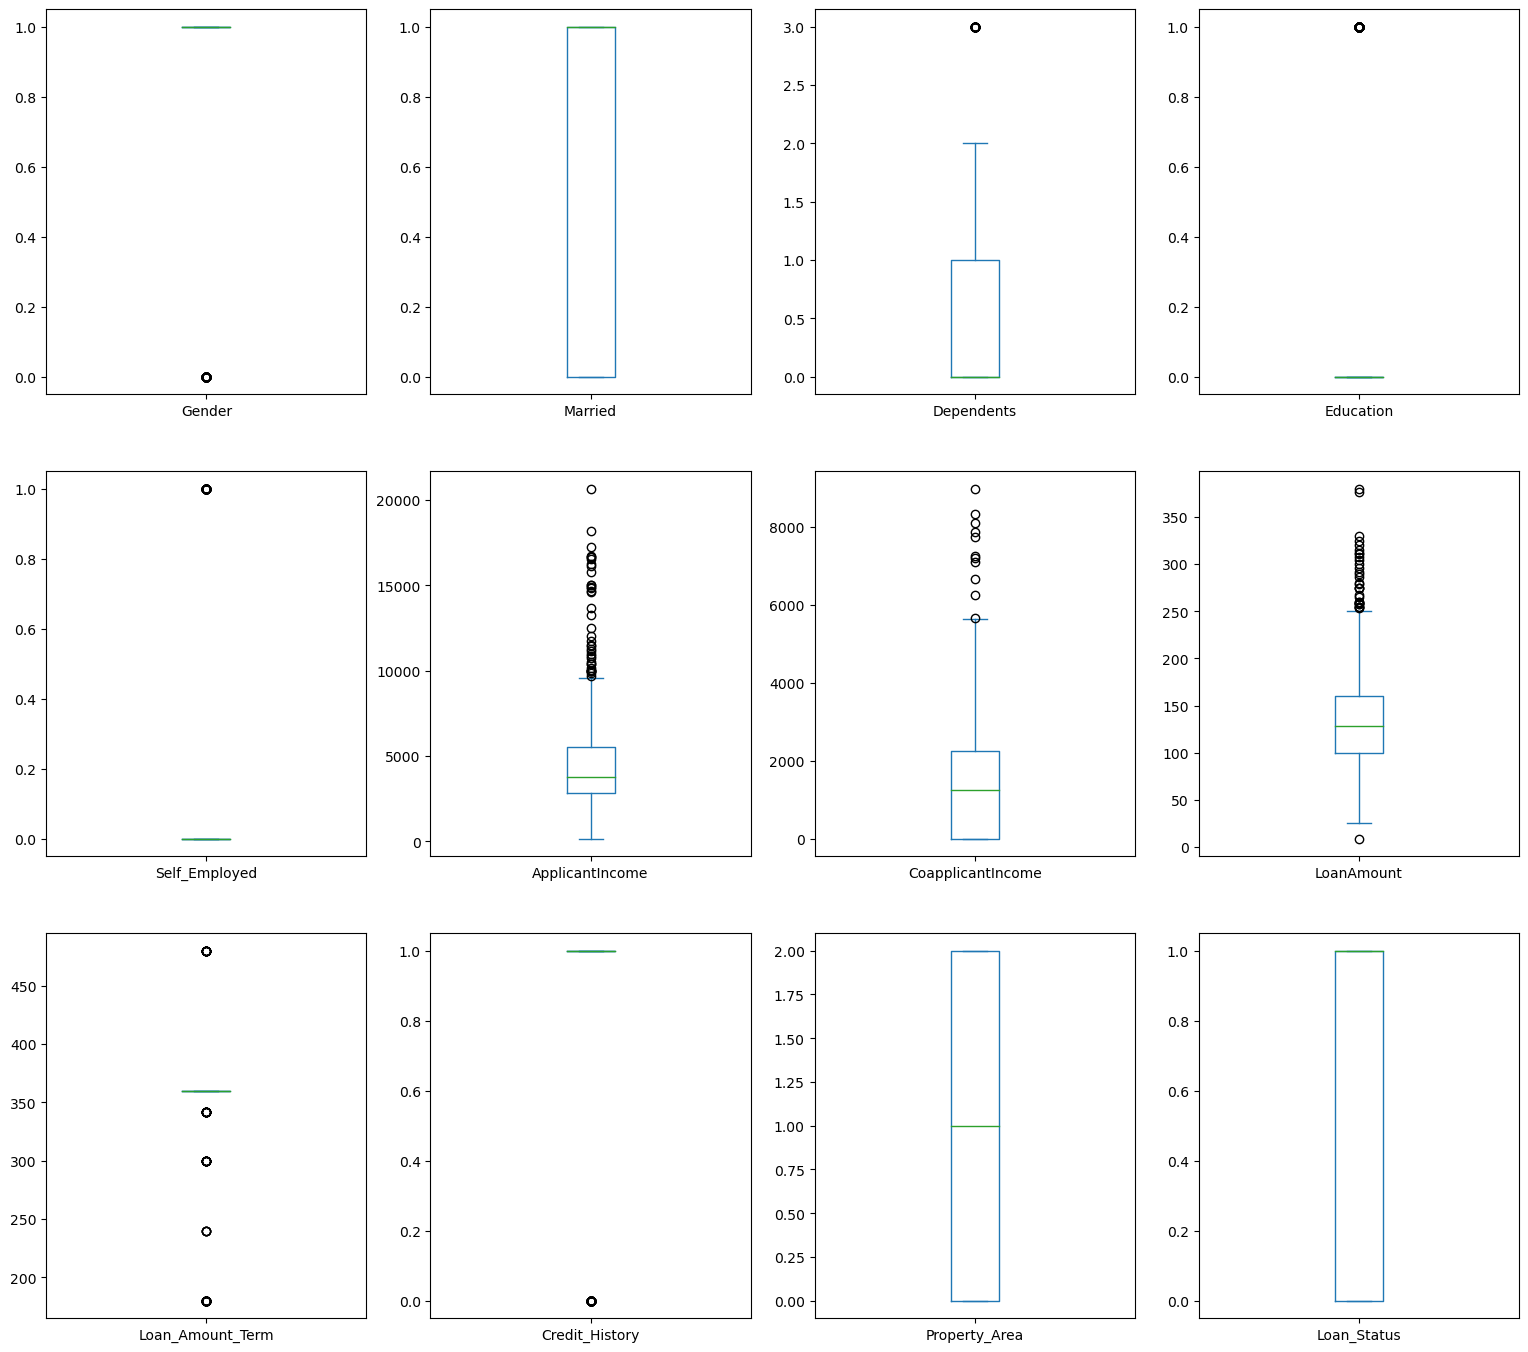

In [62]:
loan.plot(kind='box',subplots=True,layout=(3,4),figsize=(19,17))

We can see some outliers present,so we remove it through zscore method

In [55]:
z = np.abs(zscore(loan))

In [56]:
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
        7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
       dtype=int64))

In [57]:
loannew=loan[(z<3).all(axis=1)]

In [58]:
loannew.shape

(577, 12)

In [59]:
loan=loannew.copy()

In [60]:
loan.shape

(577, 12)

% loss of data=(614-577)/614 * 100=6.02%

# Skewness of the data

In [68]:


loan.skew().sort_values()

Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Gender              -1.622920
Loan_Status         -0.822635
LoanAmount          -0.697883
Married             -0.630211
CoapplicantIncome   -0.216757
ApplicantIncome     -0.204913
Property_Area       -0.055332
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
dtype: float64

In [69]:

numlist=["Loan_Amount_Term","Credit_History","Gender","CoapplicantIncome","ApplicantIncome","Education","LoanAmount"]

for col in numlist:
    if loan.skew().loc[col]>0.55:
        loan[col]=np.log1p(loan[col])


In [71]:
loan.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.204913
CoapplicantIncome   -0.216757
LoanAmount          -0.697883
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

# Splitting Feature and Target variable

In [72]:
X = loan.drop('Loan_Status', axis=1)
Y = loan['Loan_Status']



In [123]:
Y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

# Balancing the target variable

In [124]:
### as our target variable dataset is imbalanced I use oversampling technique
X, Y = oversample.fit_resample(X, Y)
Y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

# Standard scalar

In [76]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.486565,-1.318813,-0.695108,-0.605593,-0.378866,0.727839,-1.079235,0.389175,0.246418,0.578769,1.223800
1,0.486565,0.795851,0.332783,-0.605593,-0.378866,0.265190,0.834463,0.063854,0.246418,0.578769,-1.282855
2,0.486565,0.795851,-0.695108,-0.605593,2.836451,-0.538479,-1.079235,-1.533537,0.246418,0.578769,1.223800
3,0.486565,0.795851,-0.695108,1.798478,-0.378866,-0.822301,0.951282,-0.092251,0.246418,0.578769,1.223800
4,0.486565,-1.318813,-0.695108,-0.605593,-0.378866,0.776186,-1.079235,0.297969,0.246418,0.578769,1.223800


# Model Building

In [78]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State =", maxRS)

Best accuracy score is 81.90954773869346 on Random State = 543


In [79]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.22, random_state=543)
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)


In [80]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)



Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.71      0.78        69
           1       0.83      0.93      0.88       107

    accuracy                           0.85       176
   macro avg       0.85      0.82      0.83       176
weighted avg       0.85      0.85      0.84       176

Accuracy Score: 84.6590909090909
Cross Validation Score: 73.24292452830188

Accuracy Score - Cross Validation Score is 11.416166380789022


In [81]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)



Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.84      0.76        69
           1       0.88      0.76      0.81       107

    accuracy                           0.79       176
   macro avg       0.79      0.80      0.79       176
weighted avg       0.81      0.79      0.79       176

Accuracy Score: 78.97727272727273
Cross Validation Score: 77.01572327044023

Accuracy Score - Cross Validation Score is 1.9615494568325005


In [82]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)



Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83        69
           1       0.88      0.91      0.89       107

    accuracy                           0.87       176
   macro avg       0.87      0.86      0.86       176
weighted avg       0.87      0.87      0.87       176

Accuracy Score: 86.93181818181817
Cross Validation Score: 83.30503144654088

Accuracy Score - Cross Validation Score is 3.6267867352772925


In [83]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)



Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.68      0.73        69
           1       0.81      0.89      0.85       107

    accuracy                           0.81       176
   macro avg       0.80      0.78      0.79       176
weighted avg       0.81      0.81      0.80       176

Accuracy Score: 80.68181818181817
Cross Validation Score: 76.63522012578618

Accuracy Score - Cross Validation Score is 4.046598056031996


In [84]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)



Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.68      0.68        69
           1       0.79      0.79      0.79       107

    accuracy                           0.75       176
   macro avg       0.74      0.74      0.74       176
weighted avg       0.75      0.75      0.75       176

Accuracy Score: 75.0
Cross Validation Score: 74.5

Accuracy Score - Cross Validation Score is 0.5


In [85]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)



Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        69
           1       0.89      0.88      0.88       107

    accuracy                           0.86       176
   macro avg       0.85      0.85      0.85       176
weighted avg       0.86      0.86      0.86       176

Accuracy Score: 85.79545454545455
Cross Validation Score: 83.55503144654088

Accuracy Score - Cross Validation Score is 2.2404230989136664


In [86]:
# LGBM Classifier

model=lgb.LGBMClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79        69
           1       0.87      0.84      0.86       107

    accuracy                           0.83       176
   macro avg       0.82      0.83      0.82       176
weighted avg       0.83      0.83      0.83       176

Accuracy Score: 82.95454545454545
Cross Validation Score: 79.40959119496856

Accuracy Score - Cross Validation Score is 3.5449542595768975


# Hyper Parameter Tuning

In [87]:
fmod_param = {'criterion' : ['gini', 'entropy'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [42, 739, 1000],
              'max_depth' : [0, 15, 30],
              'n_estimators' : [100, 200, 300]
             }


In [89]:
grid_search = GridSearchCV(ExtraTreesClassifier(), fmod_param, cv=5)


     

In [90]:
grid_search.fit(X_train,Y_train)


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 15, 30],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [42, 739, 1000]})

In [91]:
grid_search.best_params_


{'criterion': 'gini',
 'max_depth': 30,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 739}

In [117]:
Model = ExtraTreesClassifier(criterion='gini', max_depth=30, n_estimators=100, n_jobs=-2, random_state=739)
Classifier = Model.fit(X_train, Y_train)
fmod_pred = Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Model is:", fmod_acc)



Accuracy score for the Model is: 84.42211055276381


From the above all algorithm I choose Extra Tree Classifier which predicts the Accuracy of 84.24%

# AUC-ROC Curve

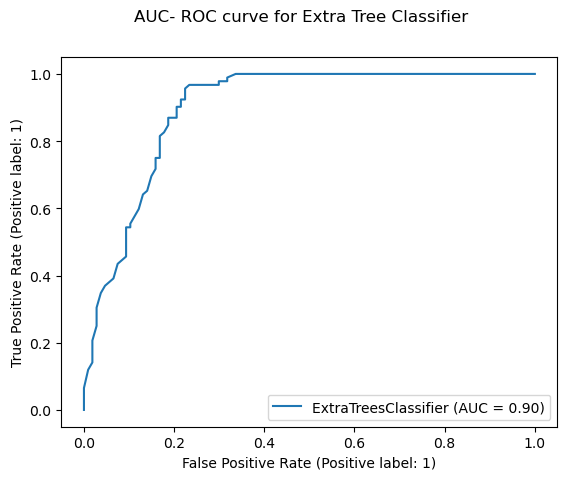

In [126]:


disp = metrics.plot_roc_curve(Model, X_test, Y_test)
disp.figure_.suptitle("AUC- ROC curve for Extra Tree Classifier")
plt.show()


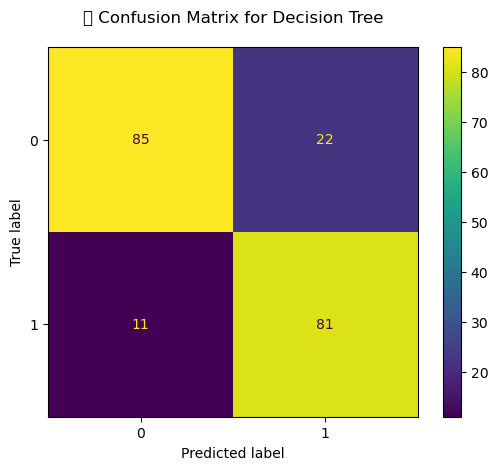

In [108]:

class_names = loan.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test)
plt.title('\t Confusion Matrix for Decision Tree\n')
plt.show()


# Model Prediction

In [111]:
fmod_predict=pd.DataFrame({'Expected':Y_test,'Predicted':fmod_pred})


In [113]:
fmod_predict.sample(10)

,Expected,Predicted
583,0,0
311,0,1
547,1,1
409,0,0
188,1,1
254,0,1
535,0,0
323,0,1
252,1,1
100,1,1


# Saving the Model

In [116]:

import pickle
filename = "Status of the Loan.pkl"
pickle.dump(Model,open(filename,'wb'))
